In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.stdout = open("text.txt", "w")
%matplotlib inline

In [285]:
data = pd.read_csv('master.csv')
data.info()

In [286]:
data = data.groupby(['worker_id','task_id']).mean()

In [287]:
data = data.reset_index(level=0)
data = data.reset_index(level=0)

In [288]:
data.head()

,task_id,worker_id,accuracy,keypress_keytypeint,keytype_changed,mouseclick_button,mousemove_distance,timestamp,work_duration
0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc,0.833333,6.879310,0.517241,0.068966,19.722592,1.470270e+12,88.318
1,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc,1.000000,3.463768,0.217391,0.376812,7.173393,1.470270e+12,34.392
2,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc,1.000000,4.918367,0.346939,0.061224,22.958495,1.470270e+12,18.640
3,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc,0.833333,6.209302,0.372093,0.093023,8.415718,1.470270e+12,15.841
4,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc,1.000000,5.755556,0.333333,0.155556,2.868044,1.470270e+12,15.844


In [289]:
data['accuracy'] = (data['accuracy'] * 6).round()

In [290]:
data['accuracy'].value_counts()

6.0    2626
5.0     923
3.0     476
0.0     475
4.0     227
1.0     218
2.0      55
Name: accuracy, dtype: int64

In [291]:
data['accuracy'].corr(data['work_duration'])

0.064000194239626426

In [292]:
fs = data[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
fs_mat = sc.fit_transform(fs)

In [293]:
featscale = pd.DataFrame(fs_mat, columns = fs.columns)

In [294]:
featscale = pd.concat([featscale,data[['accuracy']]], axis =1)

In [295]:
cor_acc_work_dur = featscale['accuracy'].corr(featscale['work_duration'])
cor_acc_key_change = featscale['accuracy'].corr(featscale['keytype_changed'])
print ('Work duration and accuracy correlation is %', cor_acc_work_dur)
print ('Key change and accuracy correlation is %', cor_acc_key_change )

In [296]:
featscale['accuracy'].value_counts()

6.0    2626
5.0     923
3.0     476
0.0     475
4.0     227
1.0     218
2.0      55
Name: accuracy, dtype: int64

In [297]:
master = featscale

In [298]:
master

,keytype_changed,mouseclick_button,work_duration,mousemove_distance,accuracy
0,1.572023,-0.389499,1.920600,0.352269,5.0
1,-1.617880,2.112354,0.181644,-0.440635,6.0
2,-0.239712,-0.452410,-0.326312,0.556725,6.0
3,0.027887,-0.193983,-0.416571,-0.362140,5.0
4,-0.384451,0.314214,-0.416474,-0.712662,6.0
5,0.669798,-0.071389,-0.607925,-0.463475,5.0
6,0.750304,0.350334,-0.327666,-0.551238,5.0
7,0.122136,-0.562981,1.512900,-0.012995,6.0
8,-0.131157,0.211015,-0.358913,-0.435204,5.0
9,-1.710387,2.442143,2.761442,1.490786,5.0


> Now master is our dataframe for 6 category values in accuracy 

### Creating feature scaled binary erroe values dataset 
#### error =1 means error 
#### error = 0 means Perfect 

In [299]:
data.loc[data['accuracy']!=6, 'error' ] = 1

In [300]:
data['error'].value_counts()

1.0    2374
Name: error, dtype: int64

In [301]:
data.loc[data['accuracy']==6, 'error'] = 0

In [302]:
data['error'].value_counts()

0.0    2626
1.0    2374
Name: error, dtype: int64

In [303]:
data['accuracy'].value_counts()

6.0    2626
5.0     923
3.0     476
0.0     475
4.0     227
1.0     218
2.0      55
Name: accuracy, dtype: int64

In [304]:
fs_mat

array([[ 1.57202259, -0.38949939,  1.9205995 ,  0.35226925],
       [-1.61787956,  2.11235369,  0.18164427, -0.44063474],
       [-0.23971163, -0.45241042, -0.3263115 ,  0.55672532],
       ..., 
       [-0.94226546, -0.03683777,  0.38773526,  0.51373434],
       [ 0.53753732, -0.13728336, -0.50589541, -0.65895427],
       [ 0.35652704, -0.10089398,  0.02408511,  1.37379169]])

In [305]:
master_binary = pd.DataFrame(fs_mat, columns = fs.columns)

In [306]:
master_binary = pd.concat([master_binary, data[['error']]], axis=1)

In [307]:
master_binary['error'].value_counts()

0.0    2626
1.0    2374
Name: error, dtype: int64

In [308]:
master_binary

,keytype_changed,mouseclick_button,work_duration,mousemove_distance,error
0,1.572023,-0.389499,1.920600,0.352269,1.0
1,-1.617880,2.112354,0.181644,-0.440635,0.0
2,-0.239712,-0.452410,-0.326312,0.556725,0.0
3,0.027887,-0.193983,-0.416571,-0.362140,1.0
4,-0.384451,0.314214,-0.416474,-0.712662,0.0
5,0.669798,-0.071389,-0.607925,-0.463475,1.0
6,0.750304,0.350334,-0.327666,-0.551238,1.0
7,0.122136,-0.562981,1.512900,-0.012995,0.0
8,-0.131157,0.211015,-0.358913,-0.435204,1.0
9,-1.710387,2.442143,2.761442,1.490786,1.0


> Now we have binary_master as our feature scaled dataset with 2 accuracy values only. 

> Let us apply our classification algorithms one by one 

# Confusion Matrix format

# Logistic Regression 

## Multiclass

### One vs rest 

In [309]:
master

,keytype_changed,mouseclick_button,work_duration,mousemove_distance,accuracy
0,1.572023,-0.389499,1.920600,0.352269,5.0
1,-1.617880,2.112354,0.181644,-0.440635,6.0
2,-0.239712,-0.452410,-0.326312,0.556725,6.0
3,0.027887,-0.193983,-0.416571,-0.362140,5.0
4,-0.384451,0.314214,-0.416474,-0.712662,6.0
5,0.669798,-0.071389,-0.607925,-0.463475,5.0
6,0.750304,0.350334,-0.327666,-0.551238,5.0
7,0.122136,-0.562981,1.512900,-0.012995,6.0
8,-0.131157,0.211015,-0.358913,-0.435204,5.0
9,-1.710387,2.442143,2.761442,1.490786,5.0


In [310]:
x = master[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
y = master['accuracy']

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state =0 )

In [313]:
from sklearn.linear_model import LogisticRegression

In [314]:
LR = LogisticRegression(multi_class='ovr')

In [315]:
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [316]:
predictions = LR.predict(x_test)

### Multinomial 

In [317]:
LR = LogisticRegression(multi_class='multinomial', solver = 'sag')
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [318]:
predictions = LR.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

## Binary

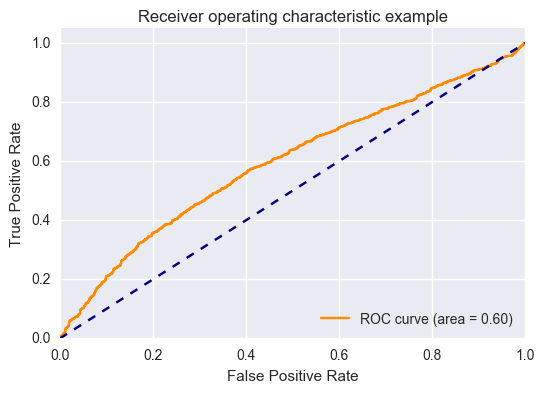

In [319]:
print ('Logistic Regression Binary')
# Selecting X and Y 
x = master_binary[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
y = master_binary['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )

#Importing logistic resgression and fitting it to data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Making predictions from test data
predictions = LR.predict(x_test)
y_score = LR.predict_proba(x_test)


#Printing results 
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

# KNN 

In [320]:
print ('KNN')
# Selecting X and Y 
x = master_binary[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
y = master_binary['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )

In [321]:
#Importing KNN Classifier and fitting it to data
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors= 300, metric = 'minkowski', p=2)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=300, p=2,
           weights='uniform')

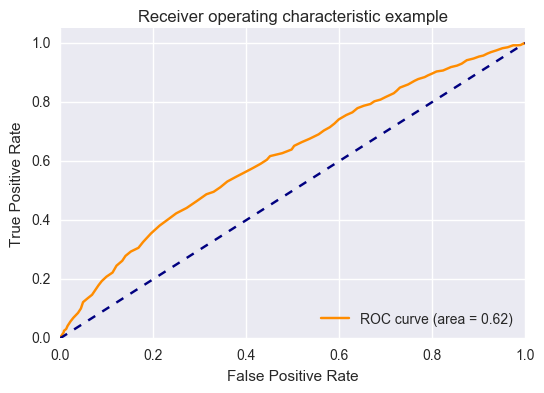

In [322]:
#Making Predictions and printing results
predictions = KNN.predict(x_test)
y_score = KNN.predict_proba(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print('Area Under the ROC Curve is ', roc_auc[1])

# Random Forrest

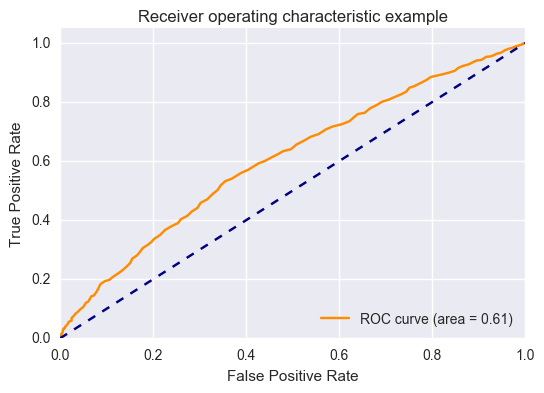

In [323]:
print ('Random Forrest Algorithm')
# Selecting X and Y 
x = master_binary[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
y = master_binary['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )

#Importing Random Forrest Classifier and fitting it to data
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 150)
RFC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = RFC.predict(x_test)
y_score = RFC.predict_proba(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

# Naive Bayes Classifier

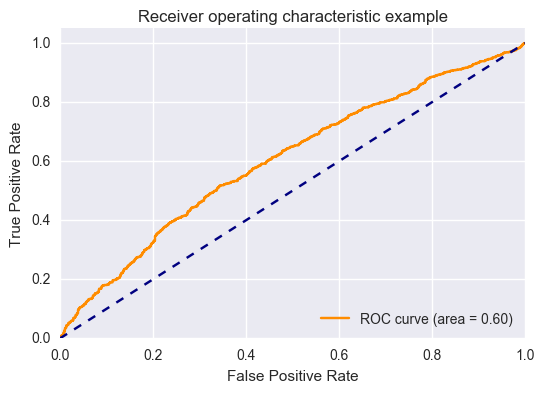

In [324]:
print ('Naive Bayes Classifier')
# Selecting X and Y 
x = master_binary[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
y = master_binary['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )

#Importing Naive Bayes Classifier and fitting it to data
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = NBC.predict(x_test)
y_score = NBC.predict_proba(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))


from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

# SVM with kernel

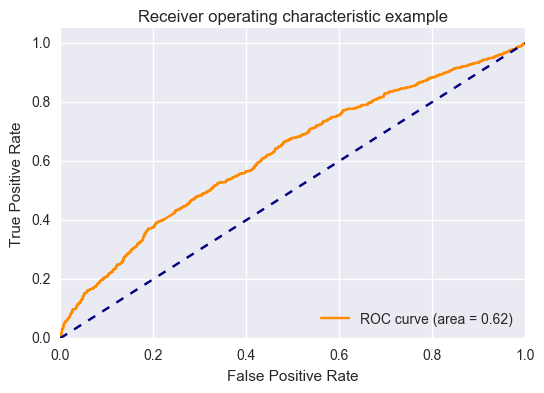

In [325]:
print ('SVM with Kernel')
# Selecting X and Y 
x = master_binary[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
y = master_binary['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )

#Importing SVM with kernel Classifier and fitting it to data
from sklearn.svm import SVC
SVMC = SVC(kernel = 'rbf', random_state = 0, probability = True)
SVMC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = SVMC.predict(x_test)
y_score = SVMC.predict_proba(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])

# Decision Tree Classifier

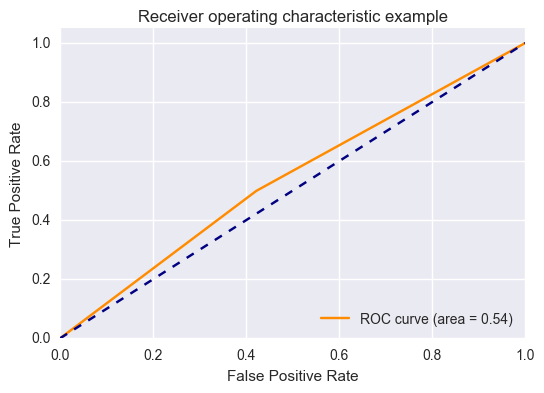

In [326]:
print ('Decision Tree Classifier')
# Selecting X and Y 
x = master_binary[['keytype_changed','mouseclick_button','work_duration','mousemove_distance']]
y = master_binary['error']

# Importing train_test_split and applying it to X and Y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state =0 )

#Importing SVM with kernel Classifier and fitting it to data
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(x_train,y_train) 

#Making Predictions and printing results
predictions = DTC.predict(x_test)
y_score = DTC.predict_proba(x_test).astype(float)


from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print('Area Under the ROC Curve is ', roc_auc[1])


## ROC Curve Code

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


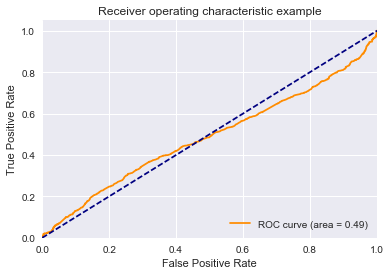

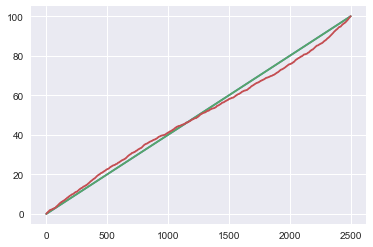

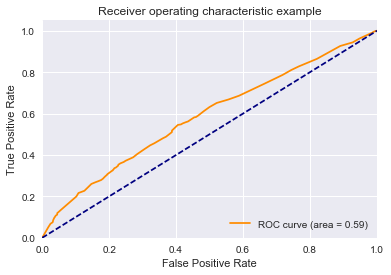

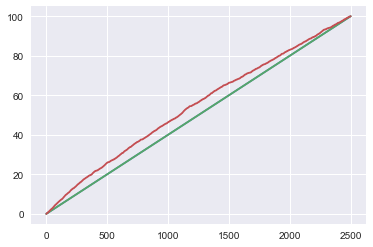

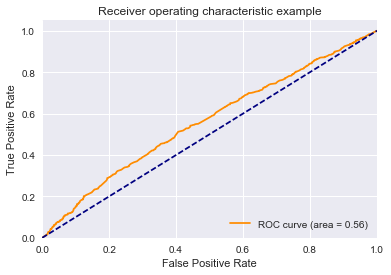

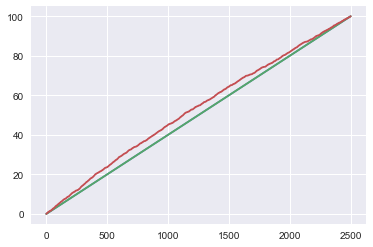

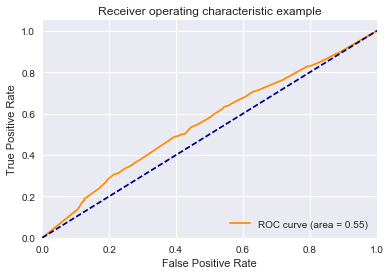

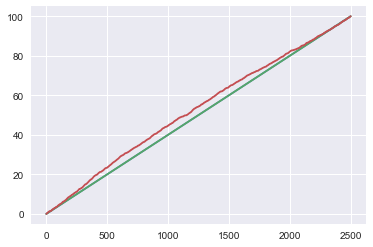

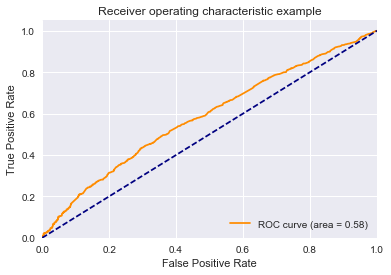

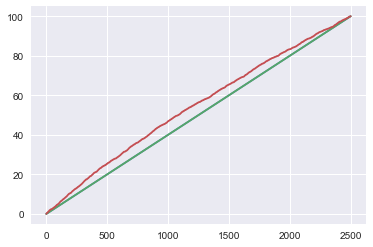

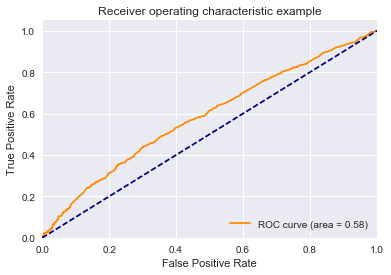

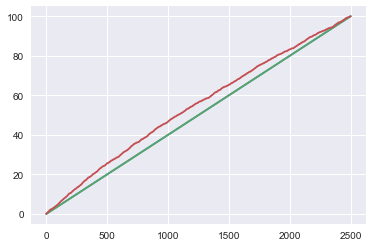

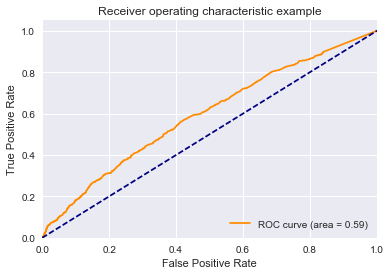

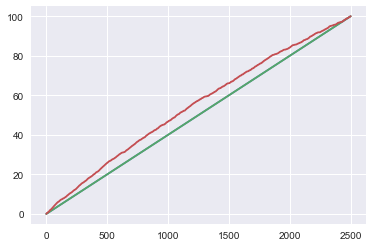

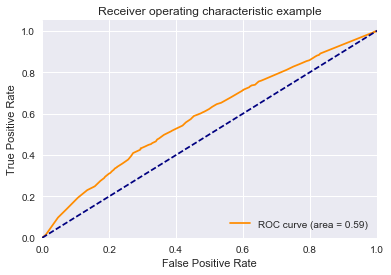

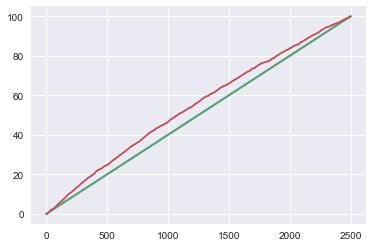

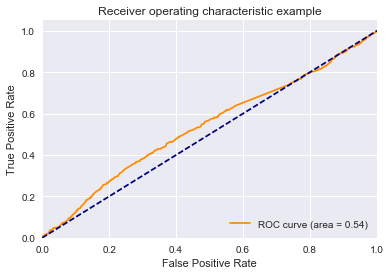

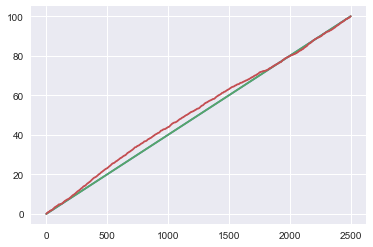

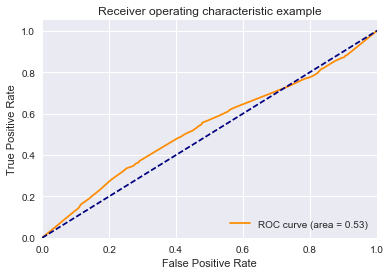

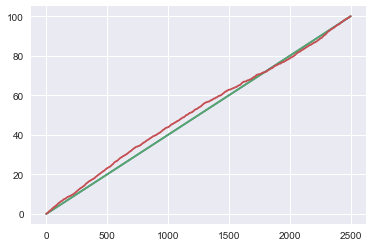

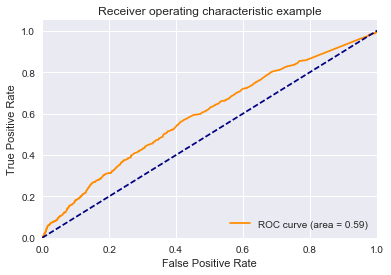

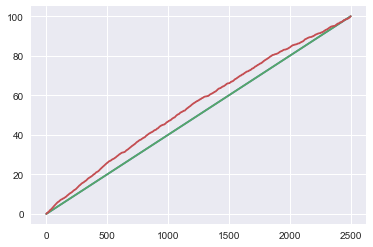

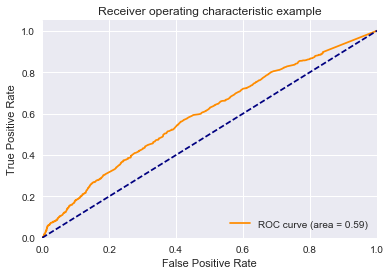

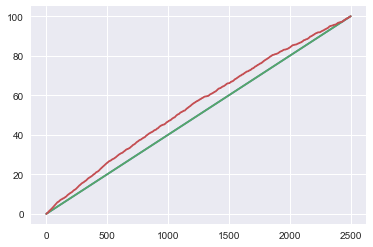

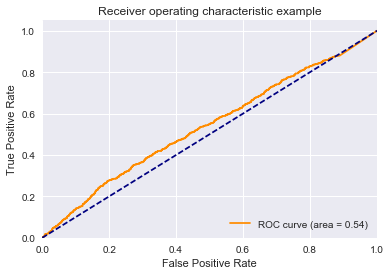

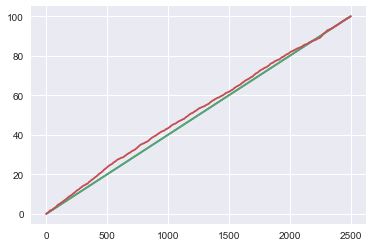

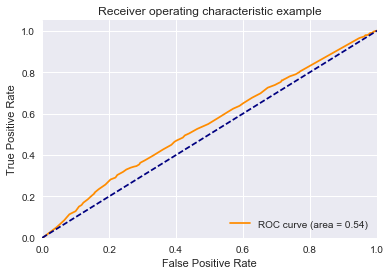

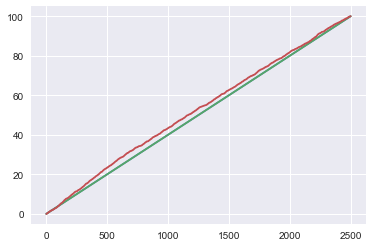

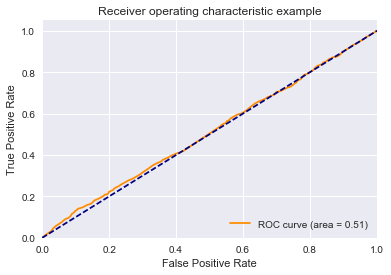

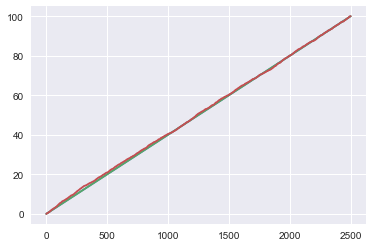

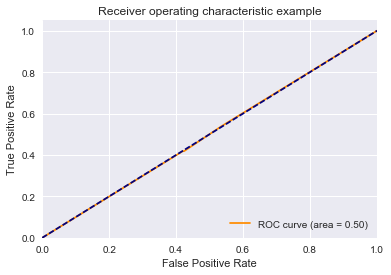

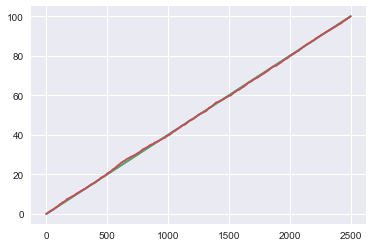

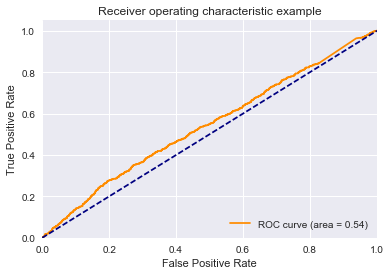

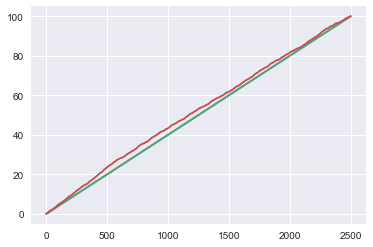

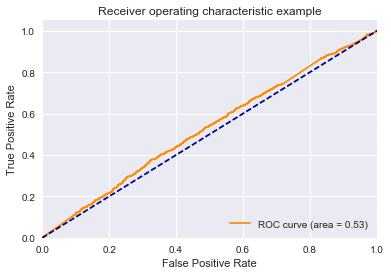

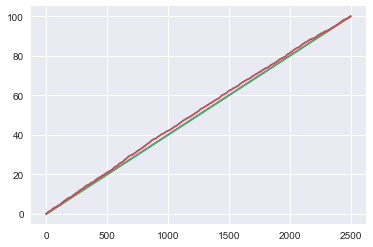

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


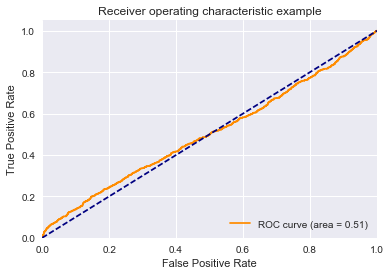

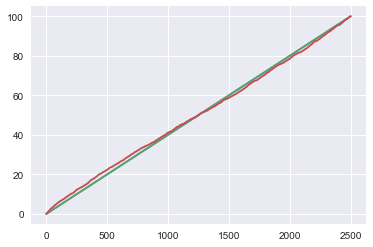

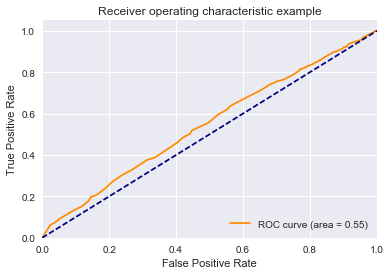

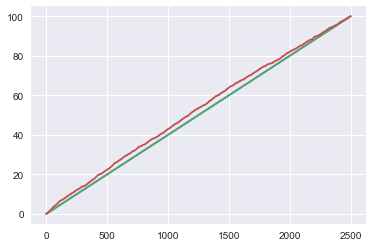

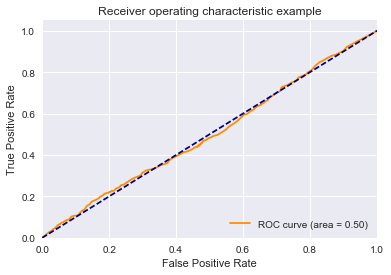

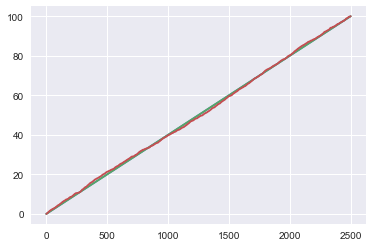

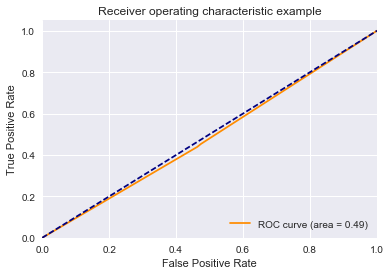

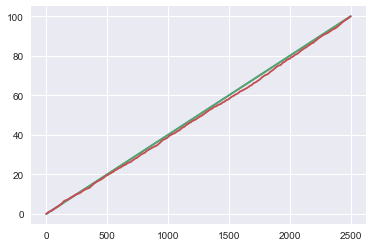

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


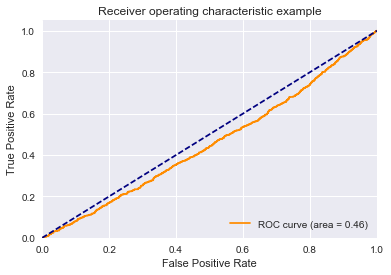

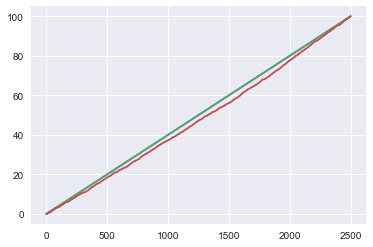

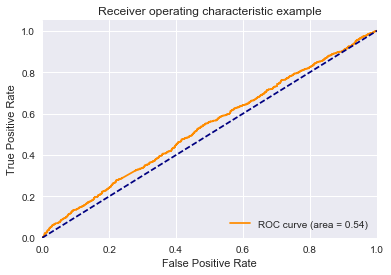

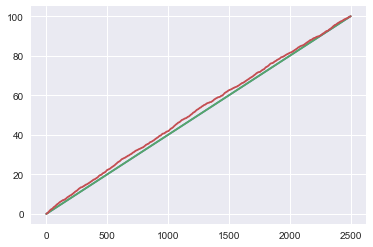

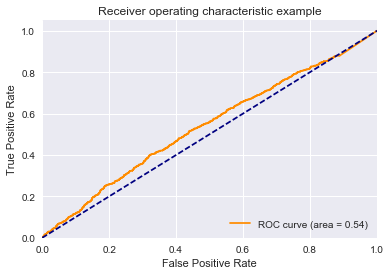

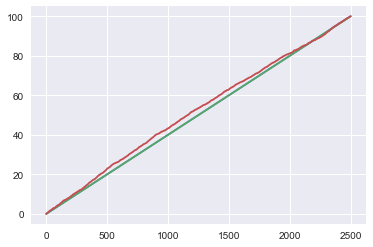

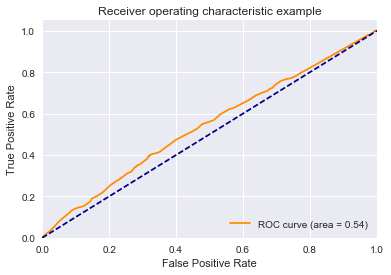

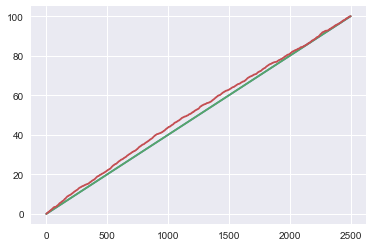

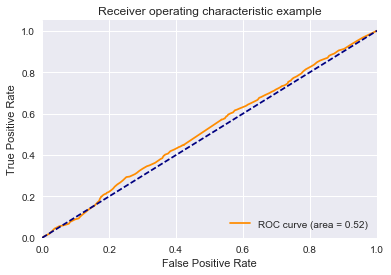

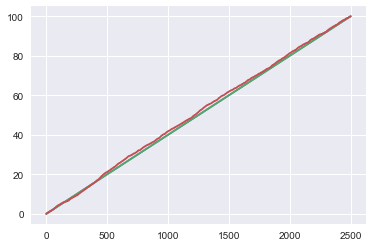

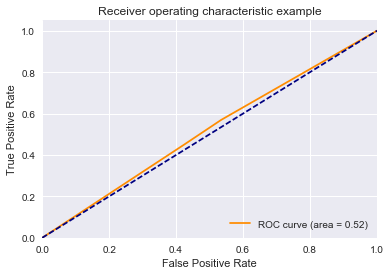

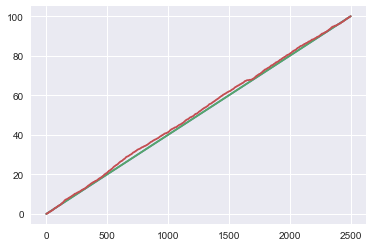

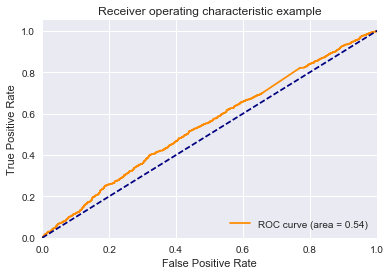

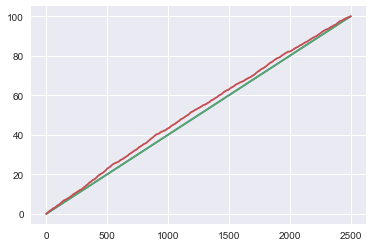

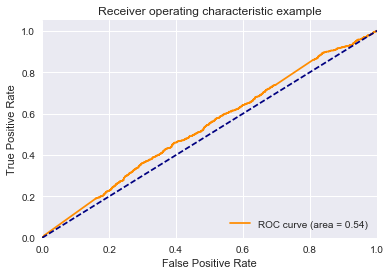

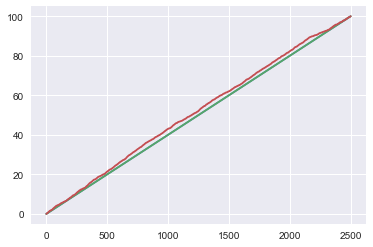

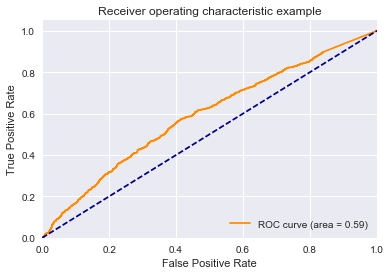

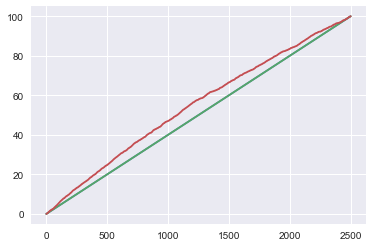

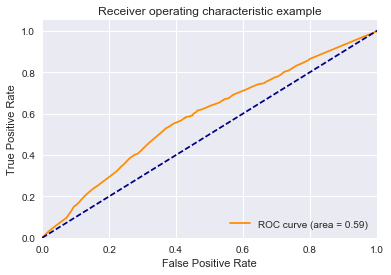

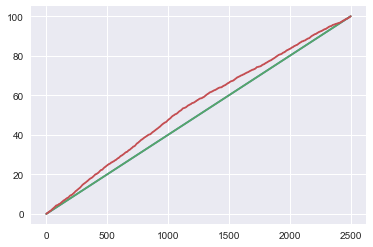

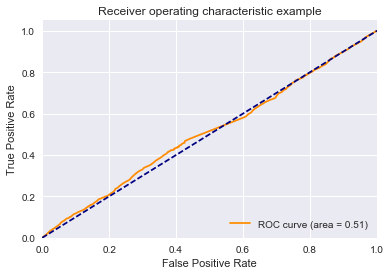

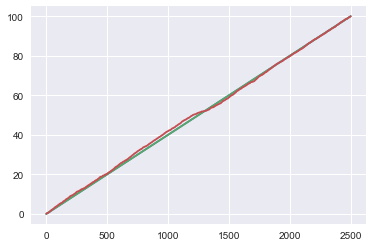

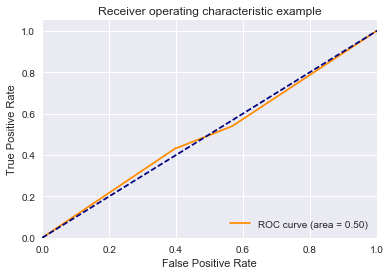

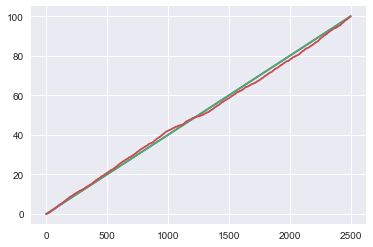

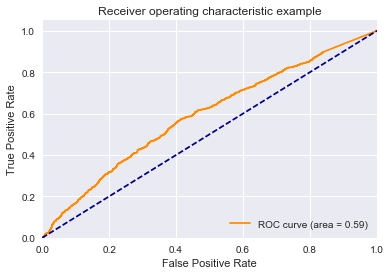

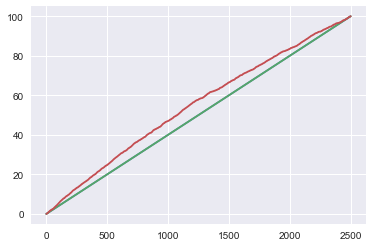

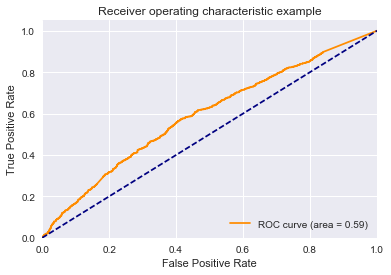

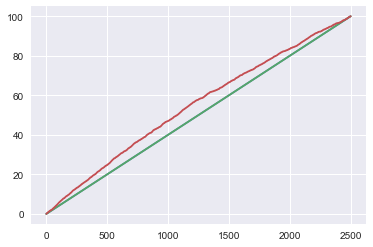

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


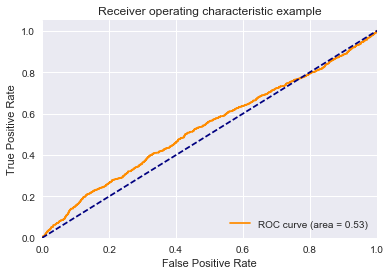

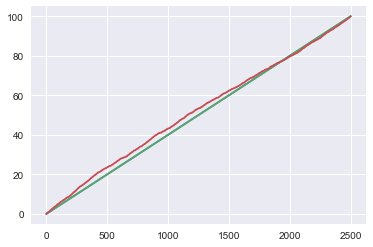

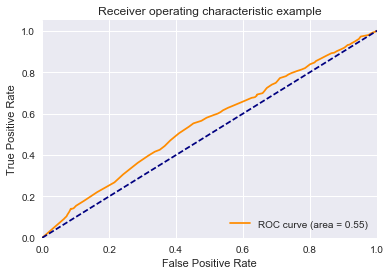

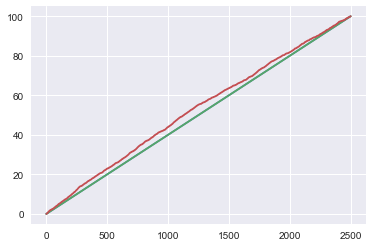

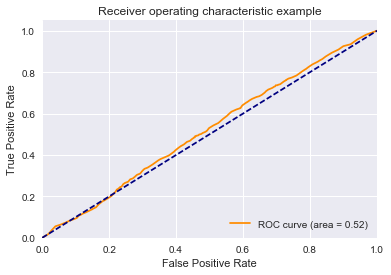

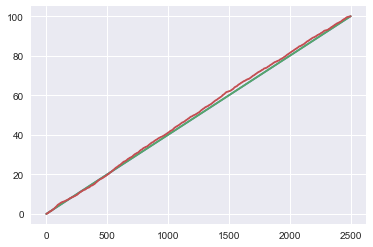

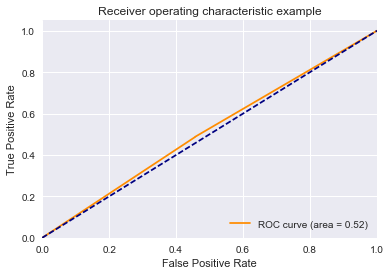

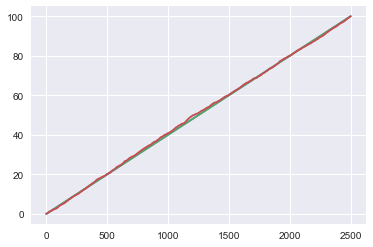

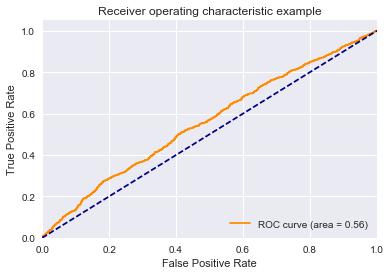

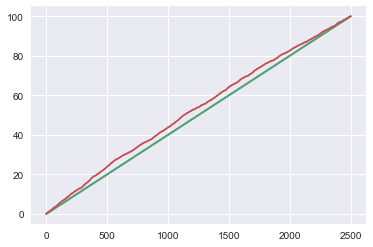

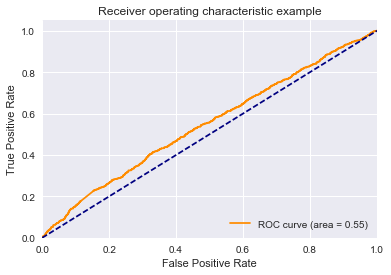

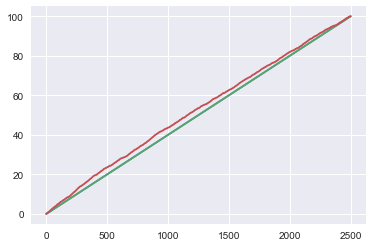

In [2]:
data = pd.read_csv('master_with_work_duration.csv')

x = data[['keytype_changed', 'mouseclick_button', 'mousemove_distance','work_duration', 'mousemove_distance_time',
       'mouseclick_button_time', 'keytype_changed_time']]
y = data['error']


from sklearn.model_selection import train_test_split
x_1, x_2, y_1, y_2 = train_test_split(x, y, test_size = 0.5, random_state =0 )

for feature in ['keytype_changed', 'mouseclick_button', 'mousemove_distance','work_duration', 'mousemove_distance_time',
       'mouseclick_button_time', 'keytype_changed_time']:
    print (feature)
    x_train = x_1[[feature]]
    y_train = y_1
    x_test = x_2[[feature]]
    y_test = y_2
    
    #1) Binary Logistic regression 
    print ('Logistic Regression Binary')

    #Importing logistic resgression and fitting it to data
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(x_train,y_train)

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()

    print(df[df['random_select_percent'] == 50])


    #------------------------------------------------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------------------------------------------------


    #2) KNN
    print ('KNN')

    #Importing logistic resgression and fitting it to data
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors= 500, metric = 'minkowski', p=2)
    model.fit(x_train,y_train)

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()



    #-------------------------------------------------------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------------------------------------------------------

    #3) Random Forrest
    print ('Random Forrest')

    #Importing logistic resgression and fitting it to data
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators = 150)
    model.fit(x_train,y_train) 

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()



    #--------------------------------------------------------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------------------------------------------------------
    #4) Decision Tree
    print ('Decision Tree')

    #Importing logistic resgression and fitting it to data
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
    model.fit(x_train,y_train)

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()


    #-----------------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------------
    #5) Naive Bayes 
    print ('Naive Bayes')

    #Importing logistic resgression and fitting it to data
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train,y_train) 

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()


    #-----------------------------------------------------------------------------------------------------------------------------
    #-----------------------------------------------------------------------------------------------------------------------------

    #6) SVM with hernel 
    print ('Naive Bayes')

    #Importing logistic resgression and fitting it to data
    from sklearn.svm import SVC
    model = SVC(kernel = 'rbf', random_state = 0, probability = True)
    model.fit(x_train,y_train) 

    #Making predictions from test data
    predictions = model.predict(x_test)
    y_score = model.predict_proba(x_test)


    #Printing results 
    from sklearn.metrics import classification_report, confusion_matrix
    print (confusion_matrix(y_test, predictions))
    print (classification_report(y_test, predictions))


    from sklearn.metrics import roc_curve, auc

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print('Area Under the ROC Curve is ', roc_auc[1])

    #CAP CURVE 
    Y_cap = np.c_[y_test,y_score[:, 1:]]
    dataframe = pd.DataFrame(data=Y_cap)

    df = dataframe
    df.columns = ['actual' , 'prob']

    df.sort_values(by = 'prob',ascending = False, inplace =True)

    total = df['actual'].sum()
    total_records = df.shape[0]
    exit_ratio = total/total_records * 100

    df = df.reset_index()
    df.drop('index', axis =1, inplace =True)

    df = df.assign(total_select_percent= range (1,2501))
    df['total_select_percent'] = df['total_select_percent'].apply(lambda x: x/total_records*100)   

    df = df.assign(random_select_percent = df['total_select_percent'])

    df = df.assign(model_select_percent = 0)
    df.loc[0,'model_select_percent'] = df['actual'][0]

    for i in range (1,df.shape[0]):
        df.loc[i, 'model_select_percent'] = df.loc[i-1, 'model_select_percent'] + df.loc[i, 'actual']

    df['model_select_percent'] = df['model_select_percent'].apply(lambda x: x/total*100)

    plt.figure()
    plt.plot(df['total_select_percent'])
    plt.plot(df['random_select_percent'])
    plt.plot(df['model_select_percent'])
    plt.show()
    
    print ('Feature Ends')
    print ('------------------------------------------------------------------------------------------')
    print ('------------------------------------------------------------------------------------------')
    print ('------------------------------------------------------------------------------------------')

In [4]:
data.columns

Index(['Unnamed: 0', 'task_id', 'worker_id', 'accuracy', 'keypress_keytypeint',
       'keytype_changed', 'mouseclick_button', 'mousemove_distance',
       'timestamp', 'work_duration', 'error', 'mousemove_distance_time',
       'mouseclick_button_time', 'keytype_changed_time'],
      dtype='object')